In [27]:
%load_ext autoreload

%autoreload

import numpy as np
import visualization.array_rendering as ar
import visualization.creature_rendering as cr
import asset_generation.land_creation as lc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


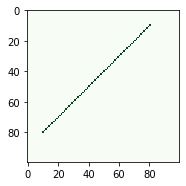

In [28]:
test_line = [80.0,10.0,10.0,80.0]
empty_template = np.zeros((100,100))
creature_id = 1

cr.detect_occluded_squares(empty_template, test_line, creature_id)

ar.render_array(empty_template)

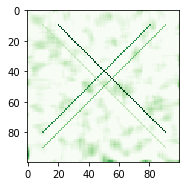

In [29]:

empty_template = lc.create_template(100, 100)
empty_template =  lc.add_smoothing_to_template(empty_template)
land, water = lc.generate_land_and_water_from_template(empty_template, 0.5)
entire_surface = lc.entire_surface(land, water)


num_segments = 4
creature_id = 0

creature = np.ndarray(shape=(num_segments + 1, 5))
creature[0,0] = creature_id
creature[1] = [.1, 10.0,10.0,90.0,90.0]
creature[2] = [.2, 10.0,90.0,90.0,10.0]
creature[3] = [.3, 80.0,10.0,10.0,80.0]
creature[4] = [.4, 80.0,90.0,10.0,20.0]

cr.place_creature(land, creature)

ar.render_array(land)